# NMR Spectra simulation

## Install required python modules

In [ ]:
%%bash
pip install -e ../.

In [ ]:
%%bash
pip install -r ../requirements.txt

## Import data

In [ ]:
import numpy as np

filename_control = '../data/Simulation/Spectra_Mixt1.txt'
filename_case = '../data/Simulation/Spectra_Mix2.txt'
data_control = np.loadtxt(filename_control, dtype=float)
data_case = np.loadtxt(filename_case, dtype=float)

In [ ]:
#Convert into dataframes
import pandas as pd

df_control = pd.DataFrame(data_control).T
df_case = pd.DataFrame(data_case).T

#Concatenate control and case df
df_NMR_intensities = pd.concat([df_control, df_case])
df_status = [0] * df_control.shape[0] + [1] * df_case.shape[0]

In [ ]:
#Convert into tf.data
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((df_NMR_intensities, df_status))
dataset.element_spec

## Write tf.Record

In [ ]:
from tfrecords import write_tfrecords

In [ ]:
write_tfrecords(dataset)

## Read the file

In [1]:
from tfrecords import read_tfrecords

In [2]:
file_paths = ['../data/tfrecords/data_{}.tfrecord'.format(i) for i in range(20)]
full_dataset = read_tfrecords(file_paths)

## Process data

In [3]:
from models import process_dataset

In [4]:
train_dataset, val_dataset, test_dataset = process_dataset(full_dataset, batch_sizes=[64] * 3, shuffle_buffers=[20000] * 3,
                                                           train_prop=0.8, val_prop=0.2)

## Define Checkpoint

In [5]:
from models import CheckpointCallback

# Create a CheckpointCallback to save the model    
ckpt = CheckpointCallback("../saved_models")

## Define MLP

In [6]:
from models import get_simple_mlp

 = get_simple_mlp(input_shape=(10000,), hidden_units=[16, 16])
simple_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [7]:
from models import get_regularised_bn_dropout_mlp

regularised_bn_dropout_model = get_regularised_bn_dropout_mlp(input_shape=(10000,), hidden_units=[1024, 1024, 1024, 512, 512, 512],
                                l2_reg_coeff=0.0001, dropout_rate=0.5)
regularised_bn_dropout_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              10241024  
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

## Compile models

In [9]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(lr=0.0005)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
acc = tf.keras.metrics.BinaryAccuracy()
earlystopping = tf.keras.callbacks.EarlyStopping(patience=200)

In [10]:
simple_model.compile(optimizer=opt, loss=loss, metrics=[acc])
history = simple_model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[ckpt])

Epoch 1/10
250/250 [==============================] - 3s 12ms/step - loss: 0.1236 - binary_accuracy: 0.9948 - val_loss: 2.8545e-08 - val_binary_accuracy: 1.0000
Epoch 2/10
250/250 [==============================] - 4s 14ms/step - loss: 0.0047 - binary_accuracy: 0.9999 - val_loss: 3.1579e-16 - val_binary_accuracy: 1.0000
Epoch 3/10
250/250 [==============================] - 4s 14ms/step - loss: 0.0419 - binary_accuracy: 0.9985 - val_loss: 0.0000e+00 - val_binary_accuracy: 1.0000
Epoch 4/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0089 - binary_accuracy: 0.9997 - val_loss: 0.1187 - val_binary_accuracy: 0.9950
Epoch 5/10
250/250 [==============================] - 4s 15ms/step - loss: 0.0060 - binary_accuracy: 0.9998 - val_loss: 0.0045 - val_binary_accuracy: 0.9998
Epoch 6/10
250/250 [==============================] - 3s 13ms/step - loss: 6.8514e-06 - binary_accuracy: 1.0000 - val_loss: 1.4216e-09 - val_binary_accuracy: 1.0000
Epoch 7/10
250/250 [==================

In [14]:
#Sanity check

for parsed_record in val_dataset.take(5):
    print((simple_model(parsed_record[0]), parsed_record[1]))

(<tf.Tensor: shape=(64, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>, <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

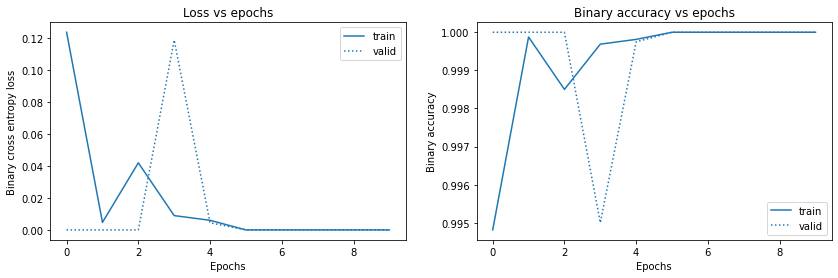

In [11]:
# Plot the learning curves

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 4))

fig.add_subplot(121)
plt.plot(history.history['loss'], label='train', color='C0', linestyle='-')
plt.plot(history.history['val_loss'], label='valid', color='C0', linestyle=':')
plt.title("Loss vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary cross entropy loss")
plt.legend()

fig.add_subplot(122)
plt.plot(history.history['binary_accuracy'], label='train', color='C0', linestyle='-')
plt.plot(history.history['val_binary_accuracy'], label='valid', color='C0', linestyle=':')
plt.title("Binary accuracy vs epochs")
plt.xlabel("Epochs")
plt.ylabel("Binary accuracy")
plt.legend()

plt.show()